## Laboratorio 5  Clusterizacion
###  07140147  José Luis Hernández
###  21001119  Velvet Gonzalez

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import date, time, datetime
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import plotly.express as px

In [2]:
def select_col_numerics(df):
    colnames = df.columns
    numeric_continues_vars = []
    for col in colnames:
        unique_values =len (df[col].unique())
        if((df[col].dtype != 'object') and (unique_values > 0)):
            numeric_continues_vars.append(col)
    return numeric_continues_vars  

In [3]:
def graficar_data_densidad(df, col1):
    sns.set_style("dark")
    x = df[col1]
    ax = sns.distplot(x, color ='#20DF97')
    plt.title("Densidad-Histograma: " + str(col1))
    plt.show()

In [4]:
data = pd.read_csv('Live.csv')
serie_temporal = pd.read_csv('Live.csv')
data.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [5]:
serie_temporal['status_published'] = (pd.to_datetime(pd.Series(serie_temporal['status_published'])).dt.strftime('%Y-%m'))
serie_temporal.drop(['Column1', 'Column2', 'Column3', 'Column4','status_id', 'status_type'], axis=1, inplace=True)
serie_temporal = serie_temporal.groupby('status_published').sum()
serie_temporal = serie_temporal.sort_values(by=['status_published'])
serie_temporal.head(5)

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
status_published,,,,,,,,,
2012-07,1700,555,14,1700,0,0,0,0,0
2012-08,3942,1464,31,3942,0,0,0,0,0
2012-09,3271,1059,42,3271,0,0,0,0,0
2012-10,2687,830,22,2687,0,0,0,0,0
2012-11,782,144,1,782,0,0,0,0,0


array([<AxesSubplot:xlabel='status_published'>,
       <AxesSubplot:xlabel='status_published'>,
       <AxesSubplot:xlabel='status_published'>,
       <AxesSubplot:xlabel='status_published'>,
       <AxesSubplot:xlabel='status_published'>,
       <AxesSubplot:xlabel='status_published'>,
       <AxesSubplot:xlabel='status_published'>,
       <AxesSubplot:xlabel='status_published'>,
       <AxesSubplot:xlabel='status_published'>], dtype=object)

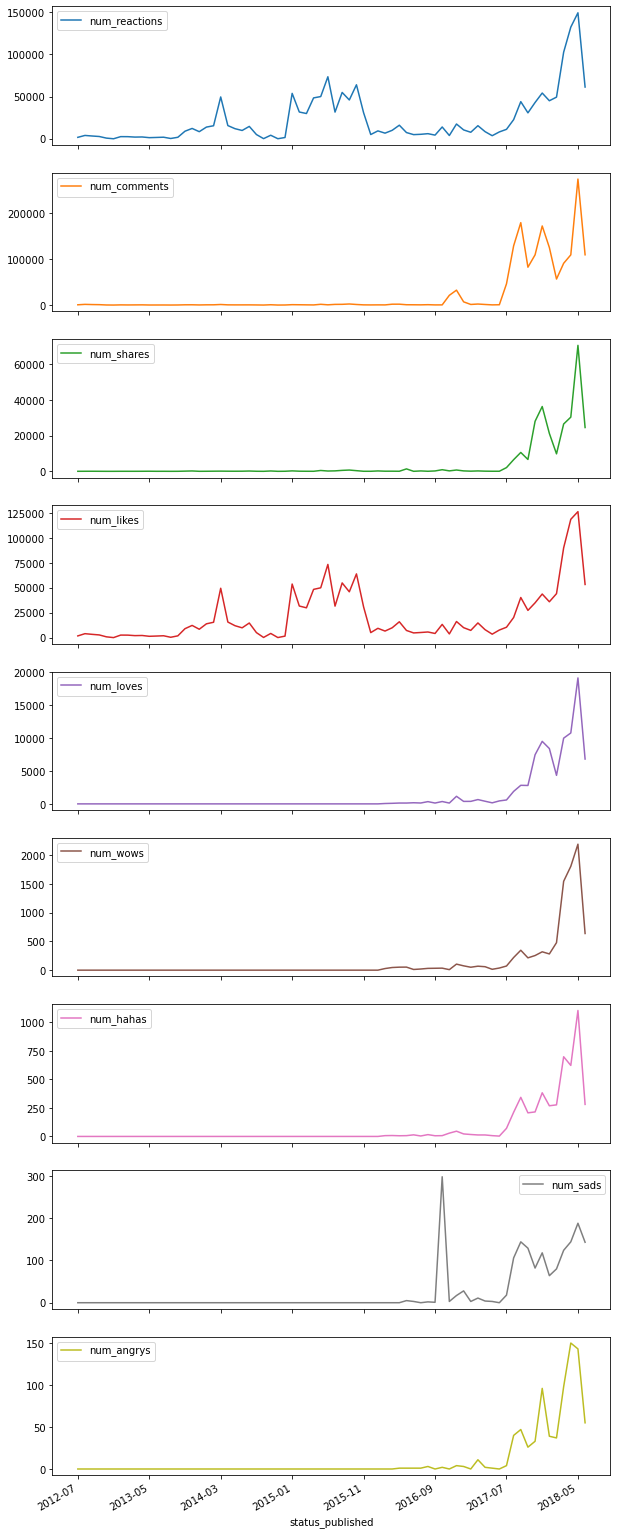

In [6]:
serie_temporal.plot(subplots=True, figsize=(10, 30))

In [7]:
data.drop(['Column1', 'Column2', 'Column3', 'Column4','status_id', 'status_published'], axis=1, inplace=True)

In [8]:
data_pca = data

In [9]:
data.head(5)
data_pca.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,video,529,512,262,432,92,3,1,1,0
1,photo,150,0,0,150,0,0,0,0,0
2,video,227,236,57,204,21,1,1,0,0
3,photo,111,0,0,111,0,0,0,0,0
4,photo,213,0,0,204,9,0,0,0,0


In [10]:
columnas_df = select_col_numerics(data)
columnas_df

['num_reactions',
 'num_comments',
 'num_shares',
 'num_likes',
 'num_loves',
 'num_wows',
 'num_hahas',
 'num_sads',
 'num_angrys']

In [11]:
data.isnull().sum()

status_type      0
num_reactions    0
num_comments     0
num_shares       0
num_likes        0
num_loves        0
num_wows         0
num_hahas        0
num_sads         0
num_angrys       0
dtype: int64

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


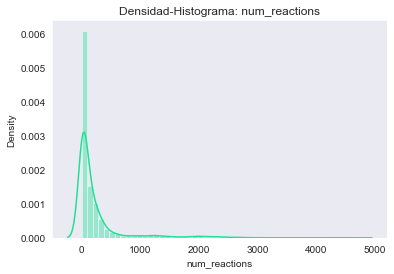

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


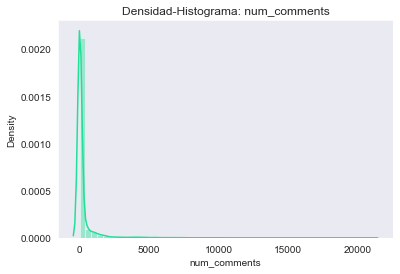

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


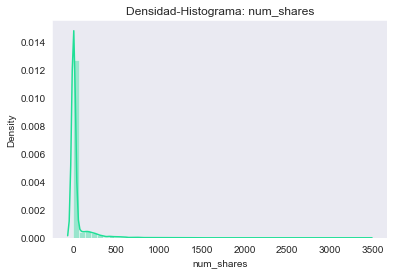

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


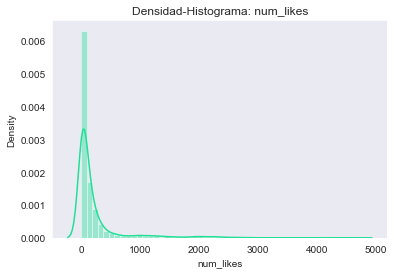

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


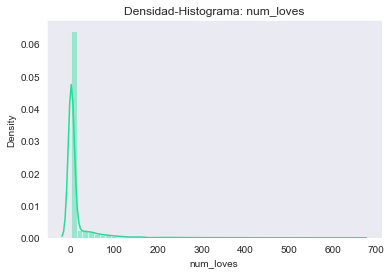

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


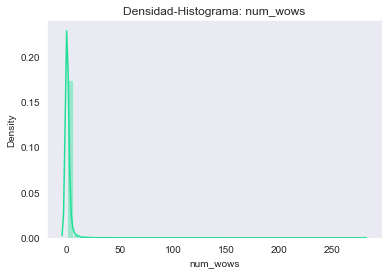

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


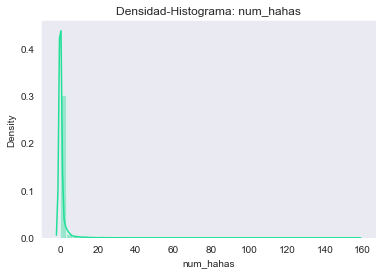

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


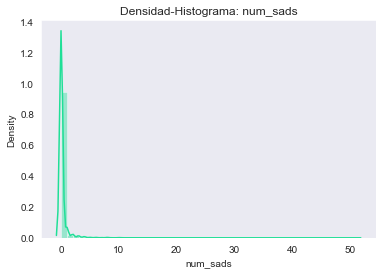

c:\Users\luish\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


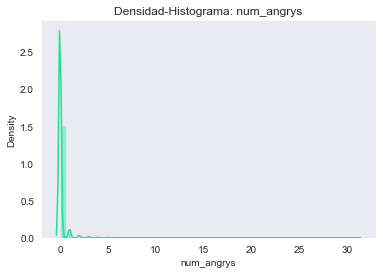

In [12]:
for col in columnas_df:
    graficar_data_densidad(data, col) 

## Codificación de Variables Categóricas

In [13]:
X = data
ytest = data['status_type']
y_test_tnse = data['status_type']

In [14]:
encoder = LabelEncoder()
X['status_type'] = encoder.fit_transform(X['status_type'])
y = encoder.transform(ytest)
X.head(5)

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0


## Estandarización de Variables

In [15]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X.values)
scaled_features_tsne = scaler.fit_transform(X.values)
scaled_features

array([[ 1.37428794,  0.64610394,  0.32335035, ...,  0.07671305,
         0.47357035, -0.15574803],
       [-0.74810636, -0.17319166, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [ 1.37428794, -0.00673846,  0.01308938, ...,  0.07671305,
        -0.152587  , -0.15574803],
       ...,
       [-0.74810636, -0.49312768, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636,  0.26131603, -0.23871662, ..., -0.17600986,
        -0.152587  , -0.15574803],
       [-0.74810636, -0.46070173, -0.25220622, ..., -0.17600986,
        -0.152587  , -0.15574803]])

In [16]:
Ks = range(1, 11)
variabilidad = []

for k in Ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_features)
    variabilidad.append(model.inertia_)

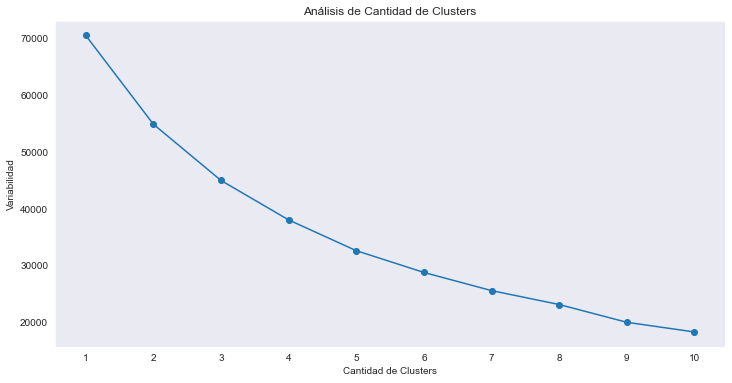

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(Ks, variabilidad, '-o')
plt.title("Análisis de Cantidad de Clusters")
plt.xlabel("Cantidad de Clusters")
plt.ylabel("Variabilidad")
plt.xticks(Ks)
plt.show()

## Scaling 

In [18]:
columnas = X.columns
minmaxscaler = MinMaxScaler()
X = minmaxscaler.fit_transform(X)

In [19]:
X = pd.DataFrame(X, columns=[columnas])
X.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0


## Modelo KMeans con K = 3

In [20]:

MODEL = KMeans(n_clusters=3)
MODEL.fit(X)
etiquetas = MODEL.labels_
etiquetas_correctas = sum(y == etiquetas)
print("Resultado: %d out of %d etiquetas colocadas correctamente." % (etiquetas_correctas, y.size))
print('Accuracy score: {0:0.2f}'. format(etiquetas_correctas/float(y.size)))

Resultado: 4163 out of 7050 etiquetas colocadas correctamente.
Accuracy score: 0.59


## Modelo KMeans con K = 2

In [21]:
MODEL2 = KMeans(n_clusters=2)
MODEL2.fit(X)
etiquetas2 = MODEL2.labels_
etiquetas_correctas2 = sum(y == etiquetas2)
print("Resultado: %d out of %d etiquetas colocadas correctamente." % (etiquetas_correctas2, y.size))
print('Accuracy score: {0:0.2f}'. format(etiquetas_correctas2/float(y.size)))

Resultado: 4288 out of 7050 etiquetas colocadas correctamente.
Accuracy score: 0.61


In [22]:
final = X

In [23]:
final['Cluster'] = MODEL2.predict(X)
final.head()

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Cluster
0,1.000000,0.112314,0.024393,0.076519,0.091720,0.140030,0.010791,0.006369,0.019608,0.0,0
1,0.333333,0.031847,0.000000,0.000000,0.031847,0.000000,0.000000,0.000000,0.000000,0.0,1
2,1.000000,0.048195,0.011243,0.016647,0.043312,0.031963,0.003597,0.006369,0.000000,0.0,0
3,0.333333,0.023567,0.000000,0.000000,0.023567,0.000000,0.000000,0.000000,0.000000,0.0,1
4,0.333333,0.045223,0.000000,0.000000,0.043312,0.013699,0.000000,0.000000,0.000000,0.0,1


## Modelo PCA

In [24]:
from sklearn.decomposition import PCA

In [25]:
data_pca

,status_type,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys
0,3,529,512,262,432,92,3,1,1,0
1,1,150,0,0,150,0,0,0,0,0
2,3,227,236,57,204,21,1,1,0,0
3,1,111,0,0,111,0,0,0,0,0
4,1,213,0,0,204,9,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
7045,1,89,0,0,89,0,0,0,0,0
7046,1,16,0,0,14,1,0,1,0,0
7047,1,2,0,0,1,1,0,0,0,0
7048,1,351,12,22,349,2,0,0,0,0


In [26]:
XPCA = data_pca.iloc[:,1:]
Xtsne = data_pca.iloc[:,1:]

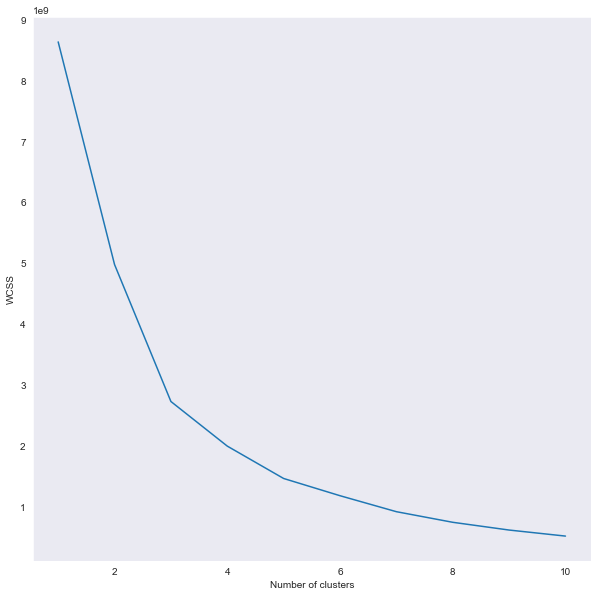

In [27]:
wcss = []
for i in range(1,11):
   model = KMeans(n_clusters = i, init = "k-means++")
   model.fit(XPCA)
   wcss.append(model.inertia_)
plt.figure(figsize=(10,10))
plt.plot(range(1,11), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
pca = PCA(2)
pca_data = pca.fit_transform(XPCA)

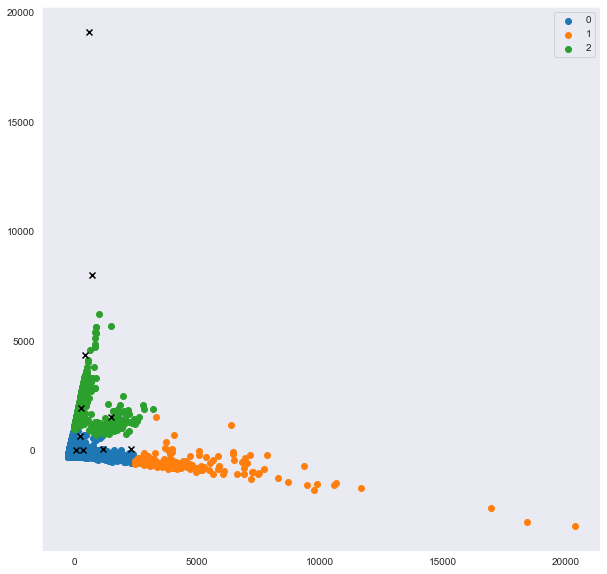

In [30]:
centers = np.array(model.cluster_centers_)
model = KMeans(n_clusters = 3, init = "k-means++")
label = model.fit_predict(pca_data)
plt.figure(figsize=(10,10))
uniq = np.unique(label)
for i in uniq:
   plt.scatter(pca_data[label == i , 0] , pca_data[label == i , 1] , label = i)
plt.scatter(centers[:,0], centers[:,1], marker="x", color='k')
#This is done to find the centroid for each clusters.
plt.legend()
plt.show()

## Modelo T-SNE

In [31]:
x_test_tsne = StandardScaler().fit_transform(Xtsne)

In [32]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2)
output = tsne.fit_transform(x_test_tsne)

In [ ]:
output

<AxesSubplot:>

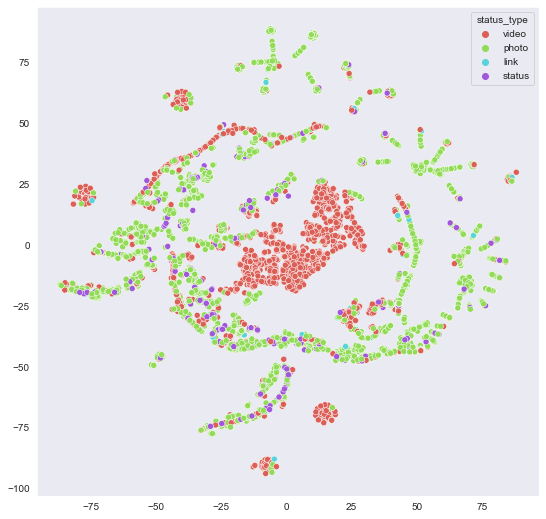

In [56]:
from tkinter import Y
import seaborn as sns
import matplotlib.patches as mpatches
palette = sns.color_palette("hls", 4)
fig,ax=plt.subplots(1,1,figsize=(9,9))
sns.scatterplot(x = output[:,0]
                , y = output[:,1]
                , hue = y_test_tnse
                , palette = palette
                , legend = 'full')

In [36]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd  

In [39]:
Xtsne = data_pca.iloc[:,1:]
ytsne = data_pca['status_type']

In [42]:
tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(Xtsne) 

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7050 samples in 0.020s...
[t-SNE] Computed neighbors for 7050 samples in 0.178s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7050
[t-SNE] Computed conditional probabilities for sample 2000 / 7050
[t-SNE] Computed conditional probabilities for sample 3000 / 7050
[t-SNE] Computed conditional probabilities for sample 4000 / 7050
[t-SNE] Computed conditional probabilities for sample 5000 / 7050
[t-SNE] Computed conditional probabilities for sample 6000 / 7050
[t-SNE] Computed conditional probabilities for sample 7000 / 7050
[t-SNE] Computed conditional probabilities for sample 7050 / 7050
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.472172
[t-SNE] KL divergence after 1000 iterations: 0.602737


In [52]:
df = pd.DataFrame()
df["y"] = ytsne
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]


In [54]:
df['y'].unique()

array([3, 1, 0, 2])

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

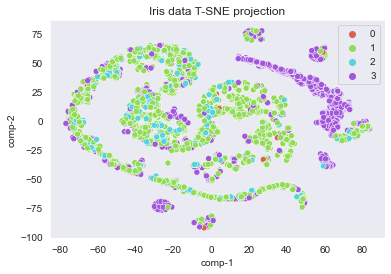

In [55]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 4),
                data=df).set(title="Iris data T-SNE projection") 

## Modelo Jerárquico


In [57]:
X_jerarquico = data_pca.iloc[:,1:]
y_jerarquico = data_pca['status_type']

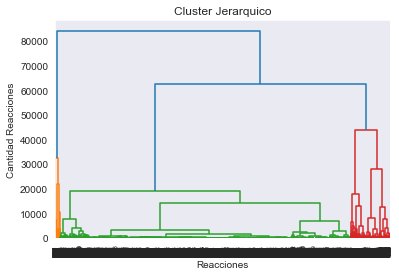

In [63]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X_jerarquico, method = 'ward'))
plt.title('Cluster Jerarquico')
plt.xlabel('Reacciones')
plt.ylabel('Cantidad Reacciones')
plt.show()